In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

spotify_csv = r"C:\Users\hayde\Downloads\archive\spotify_data.csv"
spotify_data= pd.read_csv(spotify_csv)
spotify_data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [19]:
clean_df = spotify_data.loc[(spotify_data["popularity"] > 1) & (spotify_data["year"] > 2000) ]
clean_df.dropna()
clean_df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [20]:
Mean_df = clean_df.groupby(["genre"]).mean('popularity')
Mean_df = Mean_df.rename(columns={"popularity": "Mean Popularity"})
popularity_mean = Mean_df.nlargest(10,'Mean Popularity')
pop_mean2 =(popularity_mean.loc[:, popularity_mean.columns ==  'Mean Popularity'])
pop_mean2

,Mean Popularity
genre,
pop,56.760655
rock,47.968310
hip-hop,46.938753
dance,43.887161
metal,39.924229
alt-rock,39.081774
indie-pop,36.804357
sad,36.782893
folk,34.029592


In [25]:
def linear_regress(x_val, y_val, c):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       
    
    plt.plot(x_val, regress_values, "r-")
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq, c, fontsize=15,color="red")
    plt.xlabel(f"{x_val.name}")
    plt.ylabel(f"{y_val.name}")
    plt.minorticks_on()

In [26]:
genre = ['pop', 'rock', 'hip-hop', 'dance', 'sad', 'metal', 'country']
genre_list = []
counter = 0
     
        
for i in genre: 
    
    genre_search = clean_df.loc[clean_df['genre'] == i] 
    genre_df = genre_search["popularity"]             
    genre_list.append(genre_df)    
    quartiles = genre_df.quantile([.25, .5, .75])    
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = (upperq-lowerq)
    Lower_bounds = (lowerq - (1.5*iqr))
    Upper_bounds = (upperq + (1.5*iqr))         
    if counter == 0:
        print(f" ")
    print(f"(IQR): {i} ------- {iqr}")
    print(f"(Lower quartile) : {i} ------- {lowerq}")
    print(f"(Upper quartile) : {i} ------- {upperq}")
    print(f"(Lower Bound) : {i} ------- {Lower_bounds}")  
    print(f"(Upper Bound) : {i} ------- {Upper_bounds}")  
    print(f" ")
   
    counter += 1

 
(IQR): pop ------- 17.0
(Lower quartile) : pop ------- 48.0
(Upper quartile) : pop ------- 65.0
(Lower Bound) : pop ------- 22.5
(Upper Bound) : pop ------- 90.5
 
(IQR): rock ------- 13.0
(Lower quartile) : rock ------- 41.0
(Upper quartile) : rock ------- 54.0
(Lower Bound) : rock ------- 21.5
(Upper Bound) : rock ------- 73.5
 
(IQR): hip-hop ------- 19.0
(Lower quartile) : hip-hop ------- 37.0
(Upper quartile) : hip-hop ------- 56.0
(Lower Bound) : hip-hop ------- 8.5
(Upper Bound) : hip-hop ------- 84.5
 
(IQR): dance ------- 21.0
(Lower quartile) : dance ------- 33.0
(Upper quartile) : dance ------- 54.0
(Lower Bound) : dance ------- 1.5
(Upper Bound) : dance ------- 85.5
 
(IQR): sad ------- 24.0
(Lower quartile) : sad ------- 25.0
(Upper quartile) : sad ------- 49.0
(Lower Bound) : sad ------- -11.0
(Upper Bound) : sad ------- 85.0
 
(IQR): metal ------- 12.0
(Lower quartile) : metal ------- 33.0
(Upper quartile) : metal ------- 45.0
(Lower Bound) : metal ------- 15.0
(Upper 

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jmced/Desktop/Music/output_data/Fig5.png'

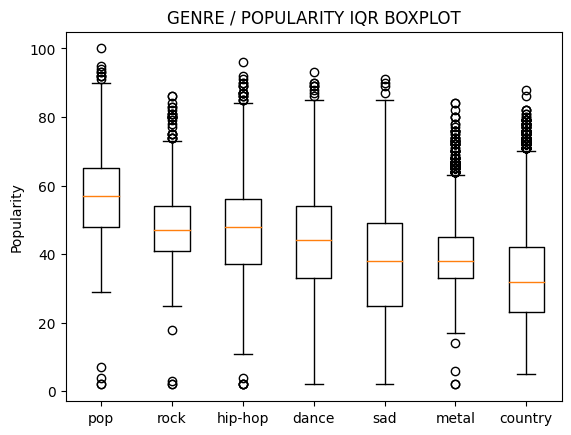

In [27]:
plt.boxplot(genre_list)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['pop', 'rock', 'hip-hop', 'dance', 'sad', 'metal', 'country'])
plt.ylabel('Popularity')
plt.title("GENRE / POPULARITY IQR BOXPLOT")
plt.savefig("C:/Users/jmced/Desktop/Music/output_data/Fig5.png")
plt.show()

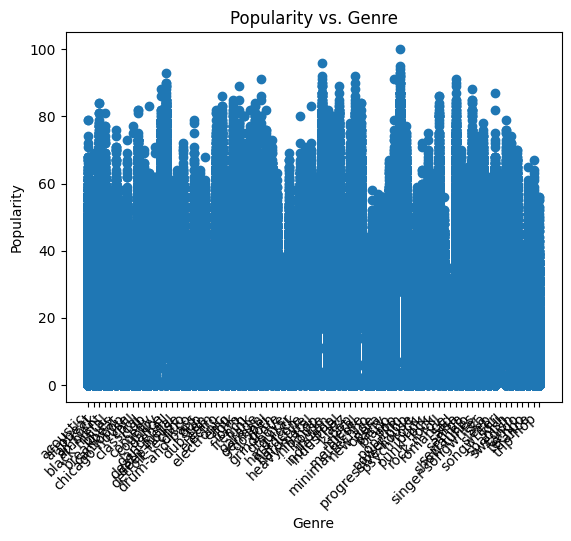

ValueError: could not convert string to float: 'Jason Mraz'

In [31]:
df = pd.read_csv(r"C:\Users\hayde\Downloads\archive\spotify_data.csv")
plt.scatter(df['genre'], df['popularity'])
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity vs. Genre')
plt.xticks(rotation=45, ha='right')
plt.show()
correlation_matrix = df.corr()
print(correlation_matrix)
genre_popularity = df.groupby('genre')['popularity'].mean()
print(genre_popularity)

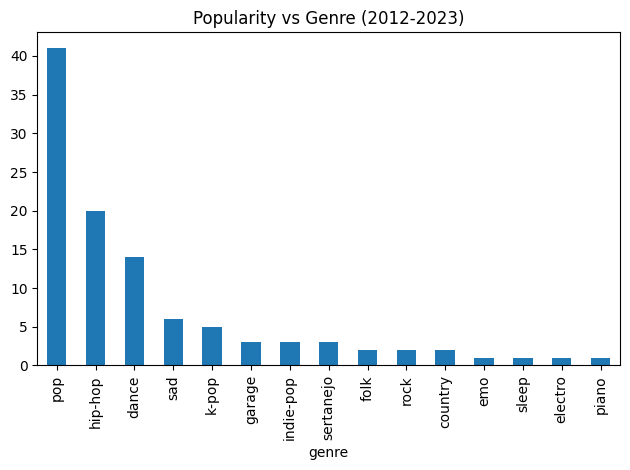

In [45]:
spotify_clean = spotify_data.drop(['track_id', 'duration_ms','Unnamed: 0','valence','key', 'mode', 'liveness', 'time_signature'], axis=1)
popular_data = spotify_clean[spotify_clean['popularity'] >= 85]
popular_data['genre'].value_counts().plot(kind='bar');
plt.xlabel = ('genre')
plt.ylabel= ('popularity')
plt.title('Popularity vs Genre (2012-2023)')
plt.tight_layout()

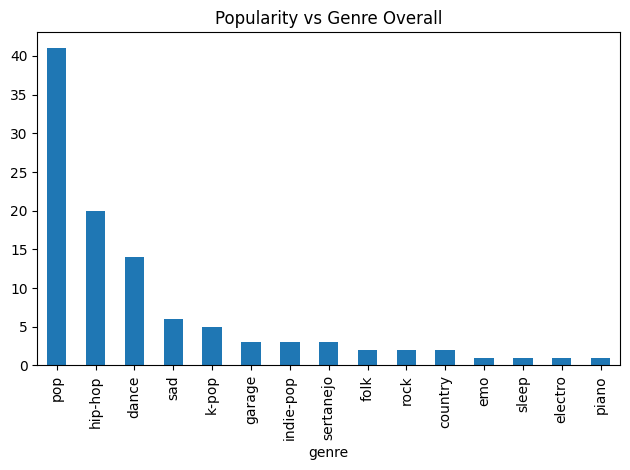

In [57]:
spotify_clean = spotify_data.drop(['track_id', 'duration_ms','Unnamed: 0','valence','key', 'mode', 'liveness', 'time_signature'], axis=1)
year_to_focus_ = 2019
popular_data = spotify_clean[spotify_clean['popularity'] >= 85]
popular_data['genre'].value_counts().plot(kind='bar');
plt.xlabel = ('genre')
plt.ylabel= ('popularity')
plt.title('Popularity vs Genre Overall')
plt.tight_layout()

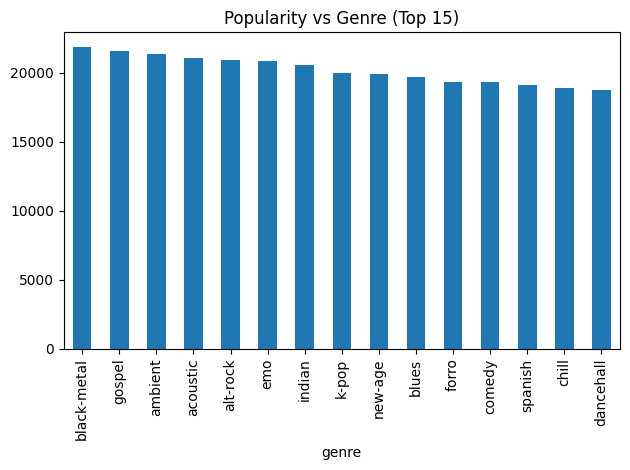

In [47]:
top_15 = spotify_clean["genre"].value_counts().nlargest(15).index
top_15
top15_data = spotify_clean[spotify_clean["genre"].isin(top_15)]
top15_data['genre'].value_counts().plot(kind='bar');
plt.xlabel = ('genre')
plt.ylabel= ('popularity')
plt.title('Popularity vs Genre (Top 15)')
plt.tight_layout()


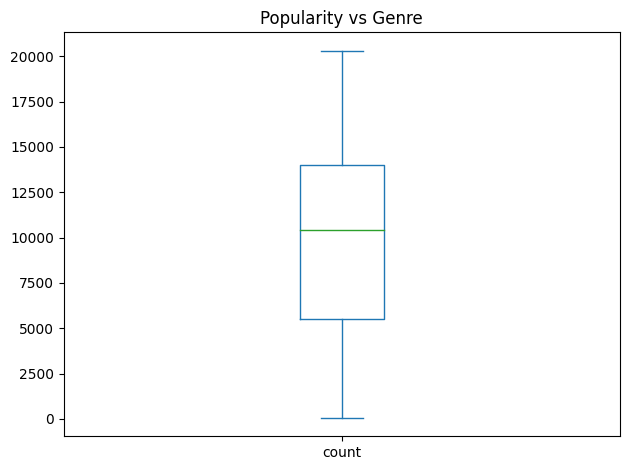

In [54]:
spotify_clean = spotify_data.drop(['track_id', 'duration_ms','Unnamed: 0','valence','key', 'mode', 'liveness', 'time_signature'], axis=1)
popular_data = spotify_clean[spotify_clean['popularity'] <= 25]
popular_data['genre'].value_counts().plot(kind='box');
plt.xlabel = ('genre')
plt.ylabel= ('popularity')
plt.title('Popularity vs Genre')
plt.tight_layout()

TypeError: 'str' object is not callable

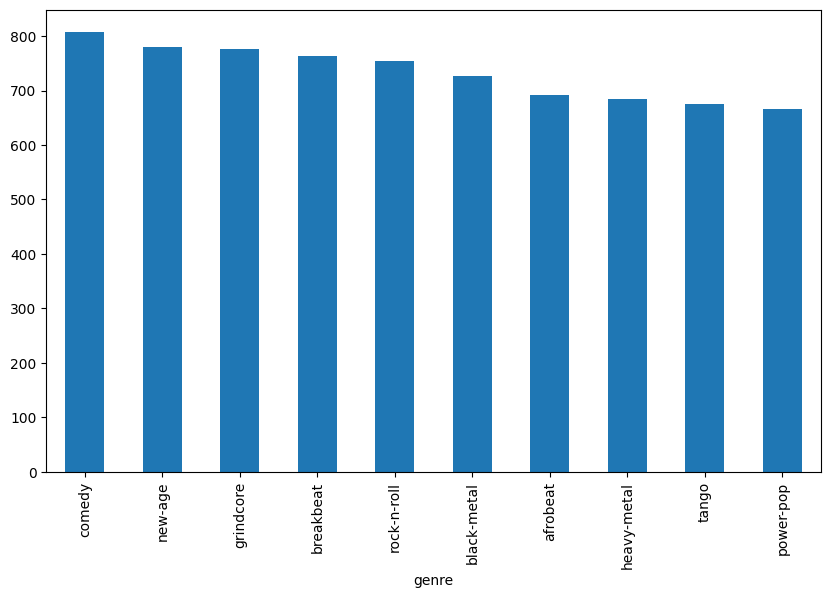

In [55]:
spotify_clean = spotify_data.drop(['track_id', 'duration_ms', 'Unnamed: 0', 'valence', 'key', 'mode', 'liveness', 'time_signature'], axis=1)
year_to_focus = 2019

popular_data = spotify_clean[(spotify_clean['year'] == year_to_focus) & (spotify_clean['popularity'] <= 20)]

genre_counts = popular_data['genre'].value_counts()

num_genres_to_show = 10
top_genres = genre_counts.nlargest(num_genres_to_show)

plt.figure(figsize=(10, 6))  

top_genres.plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title(f'Popularity of Top {num_genres_to_show} Genres in {year_to_focus}')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

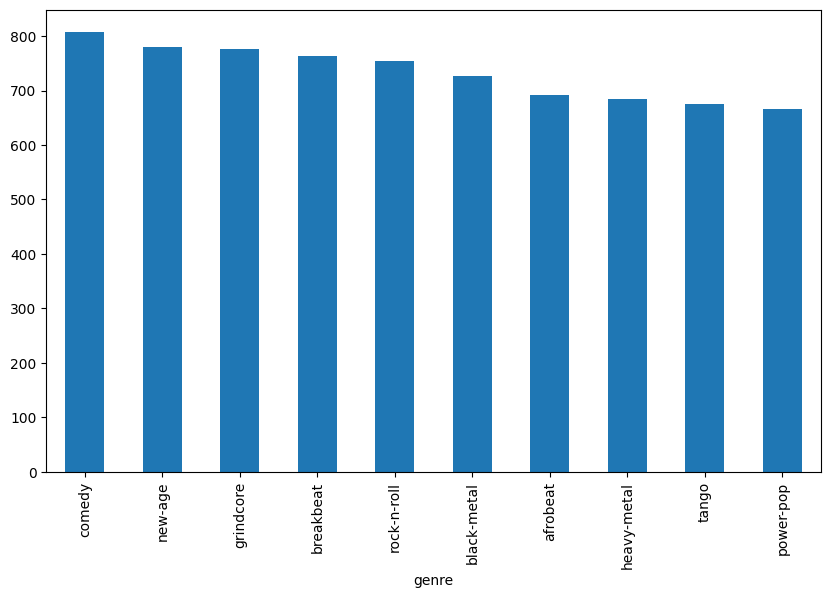

In [56]:
spotify_clean = spotify_data.drop(['track_id', 'duration_ms', 'Unnamed: 0', 'valence', 'key', 'mode', 'liveness', 'time_signature'], axis=1)
year_to_focus = 2019


popular_data = spotify_clean[(spotify_clean['year'] == year_to_focus) & (spotify_clean['popularity'] <= 20)]

genre_counts = popular_data['genre'].value_counts()


num_genres_to_show = 10
top_genres = genre_counts.nlargest(num_genres_to_show)

plt.figure(figsize=(10, 6))  

top_genres.plot(kind='bar')

plt.xlabel('Genre')  
plt.ylabel('Popularity')  
plt.title(f'Popularity of Top {num_genres_to_show} Genres in {year_to_focus}')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()